## Importing :

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score,accuracy_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:

digites = load_digits()
print('_____________________Descripe________________')
print(F" DESCRIPTION :{digites.DESCR}")
print("______________________target__________________________")
print(digites.target.shape)
print("______________________________________Data___________________")
print(digites.data.shape)
print("________________________________________-Data or future but likre image___________________________")
print(digites.images.shape)

_____________________Descripe________________
 DESCRIPTION :.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number 

-------------------------------index of the 500   is :
8


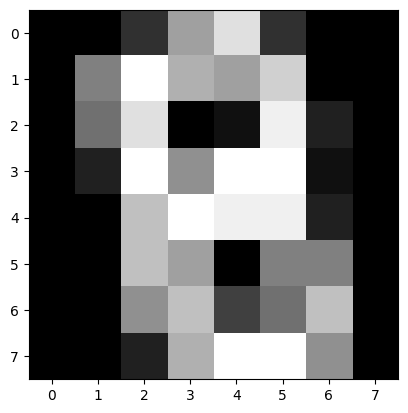

In [3]:

x=digites.images[500]
print("-------------------------------index of the 500   is :")
print(digites.target[500])

plt.gray()

plt.imshow(x)


plt.show()

## Preprocessing :

In [4]:
x_train,x_test,y_train,y_test = train_test_split(digites.data,digites.target,test_size=0.3)
scaller=MinMaxScaler()
x_train=scaller.fit_transform(x_train)
x_test=scaller.transform(x_test)

## Calculate :

In [5]:
def calculat_matrix(y_train,y_test,pred_x_train,pred_x_test):
    acc_train=accuracy_score(y_true=y_train,y_pred=pred_x_train)
    acc_test=accuracy_score(y_test,pred_x_test)
    p=precision_score(y_true=y_test,y_pred=pred_x_test,average='weighted')
    r=recall_score(y_true=y_test,y_pred=pred_x_test,average='weighted')

    print(f"acc_tran=> {acc_train} - acc_test=> {acc_test} - presion=> {p} - recall=>{r}")

    return acc_train,acc_test,p,r # I return this

## Randome Forest :

In [6]:
rf=RandomForestClassifier(max_depth=128,n_estimators=256)
rf.fit(x_train,y_train)

pred_x_train=rf.predict(x_train)
pred_x_test=rf.predict(x_test)

acc_train_rf,acc_test_rf,p_rf,r_rf = calculat_matrix(y_train,y_test,pred_x_train,pred_x_test)

acc_tran=> 1.0 - acc_test=> 0.9740740740740741 - presion=> 0.9743034448120027 - recall=>0.9740740740740741


## SVM :

In [7]:
svm=SVC(kernel='linear')   # you can change the armater of thsi the deeffrint you know , I thing  the poly kernel be soo good
svm.fit(x_train,y_train)


pred_x_train=svm.predict(x_train)
pred_x_test=svm.predict(x_test)

acc_train_svm,acc_test_svm,p_svm,r_svm = calculat_matrix(y_train,y_test,pred_x_train,pred_x_test)



acc_tran=> 0.9976133651551312 - acc_test=> 0.9814814814814815 - presion=> 0.9818442416929237 - recall=>0.9814814814814815


## ANN :

In [8]:
ann=MLPClassifier(hidden_layer_sizes=256,batch_size=64,solver='adam',learning_rate='adaptive')# batch_size in the defalot one mean "ba jay in ka yak yak bidahad 64ta bidahad"
ann.fit(x_train,y_train)

pass # Now cheak the performance you knoow   :

pred_x_train=ann.predict(x_train)
pred_x_test=ann.predict(x_test)

acc_train_ann,acc_test_ann,p_ann,r_ann = calculat_matrix(y_train,y_test,pred_x_train,pred_x_test)


acc_tran=> 1.0 - acc_test=> 0.9777777777777777 - presion=> 0.9783152204777323 - recall=>0.9777777777777777


## KNN :

In [9]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)


pred_x_train=knn.predict(x_train)
pred_x_test=knn.predict(x_test)

acc_train_knn,acc_test_knn,p_knn,r_knn = calculat_matrix(y_train,y_test,pred_x_train,pred_x_test)

acc_tran=> 0.9832935560859188 - acc_test=> 0.987037037037037 - presion=> 0.9871377567088123 - recall=>0.987037037037037


 ## Compersion :

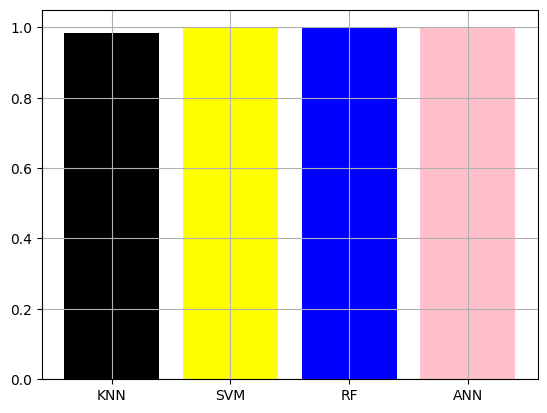

In [10]:
acc_train=[acc_train_knn, acc_train_svm, acc_train_rf, acc_train_ann]
title = ["KNN","SVM","RF","ANN"]
colors=["black","yellow","blue","pink"]
plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()

## Testing :

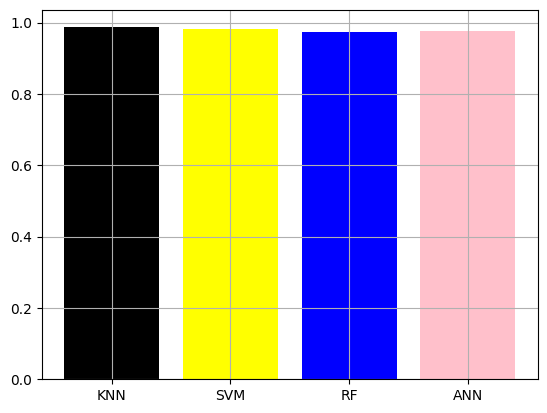

In [11]:
acc_test=[acc_test_knn, acc_test_svm, acc_test_rf, acc_test_ann]
title = ["KNN","SVM","RF","ANN"]
colors=["black","yellow","blue","pink"]
plt.bar(title,acc_test,color=colors)
plt.grid()
plt.show()
